TensorFlow version = 2.18.0

Loaded 3570 samples from punch.csv
Loaded 3570 samples from flex.csv
Loaded 3570 samples from wave.csv


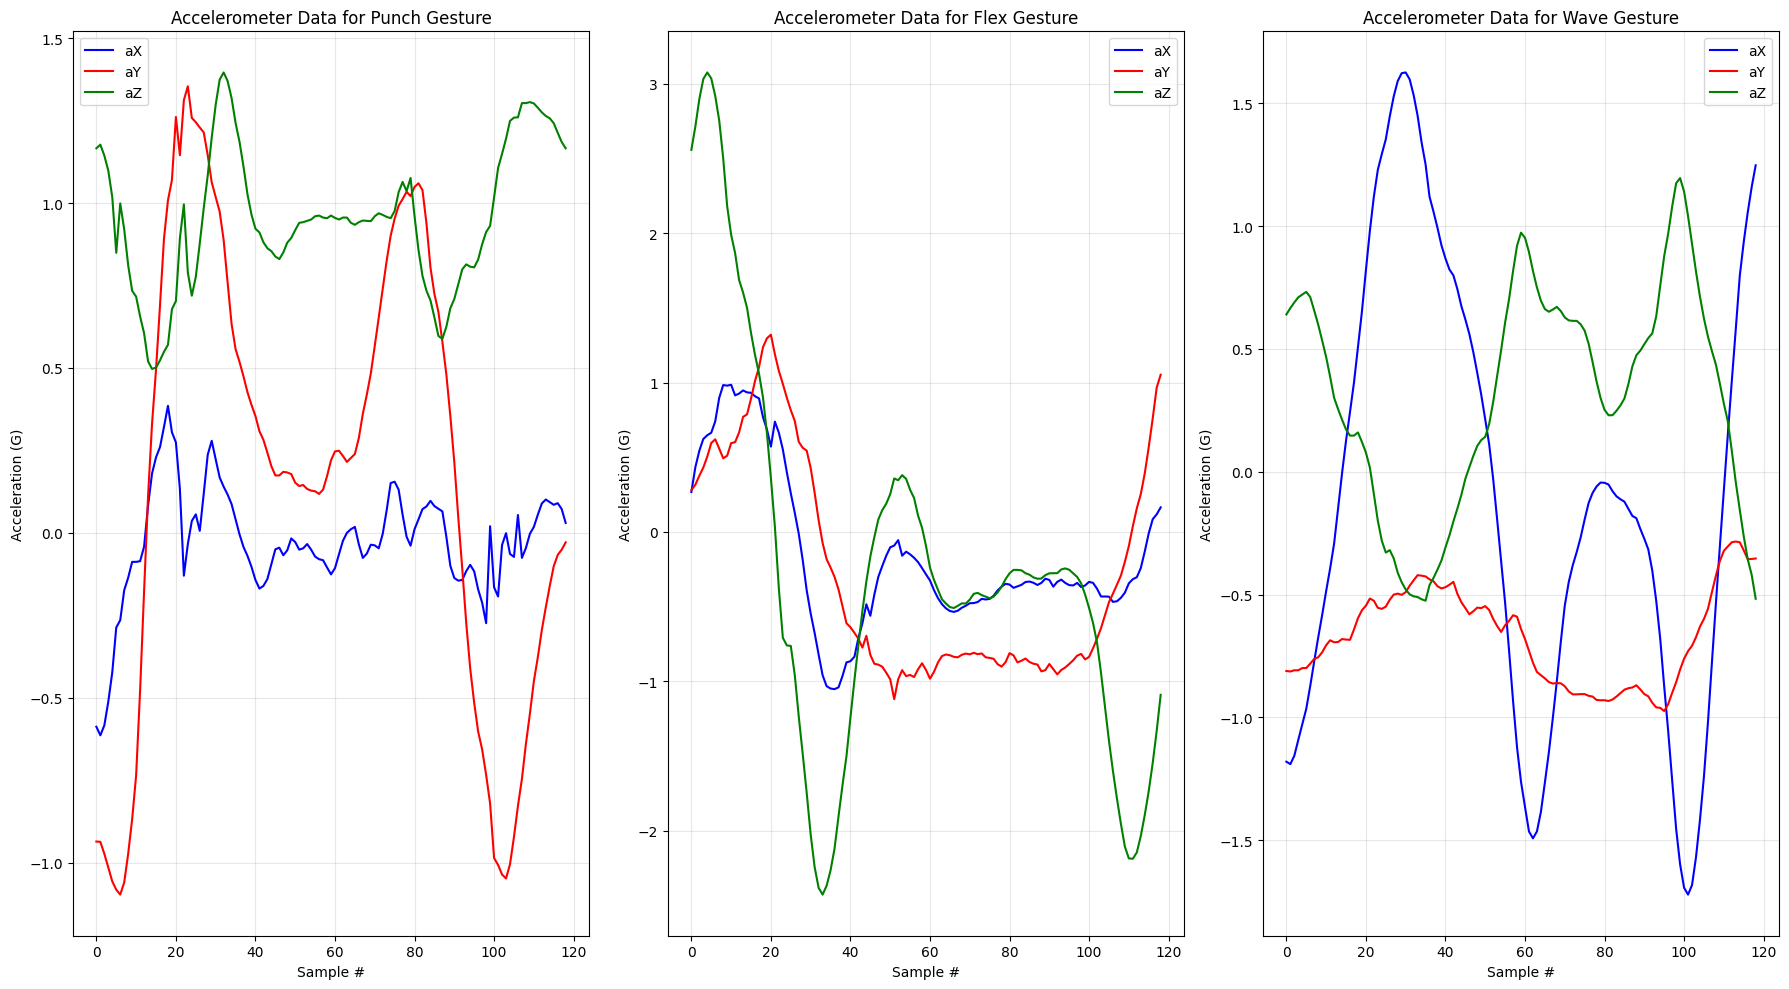

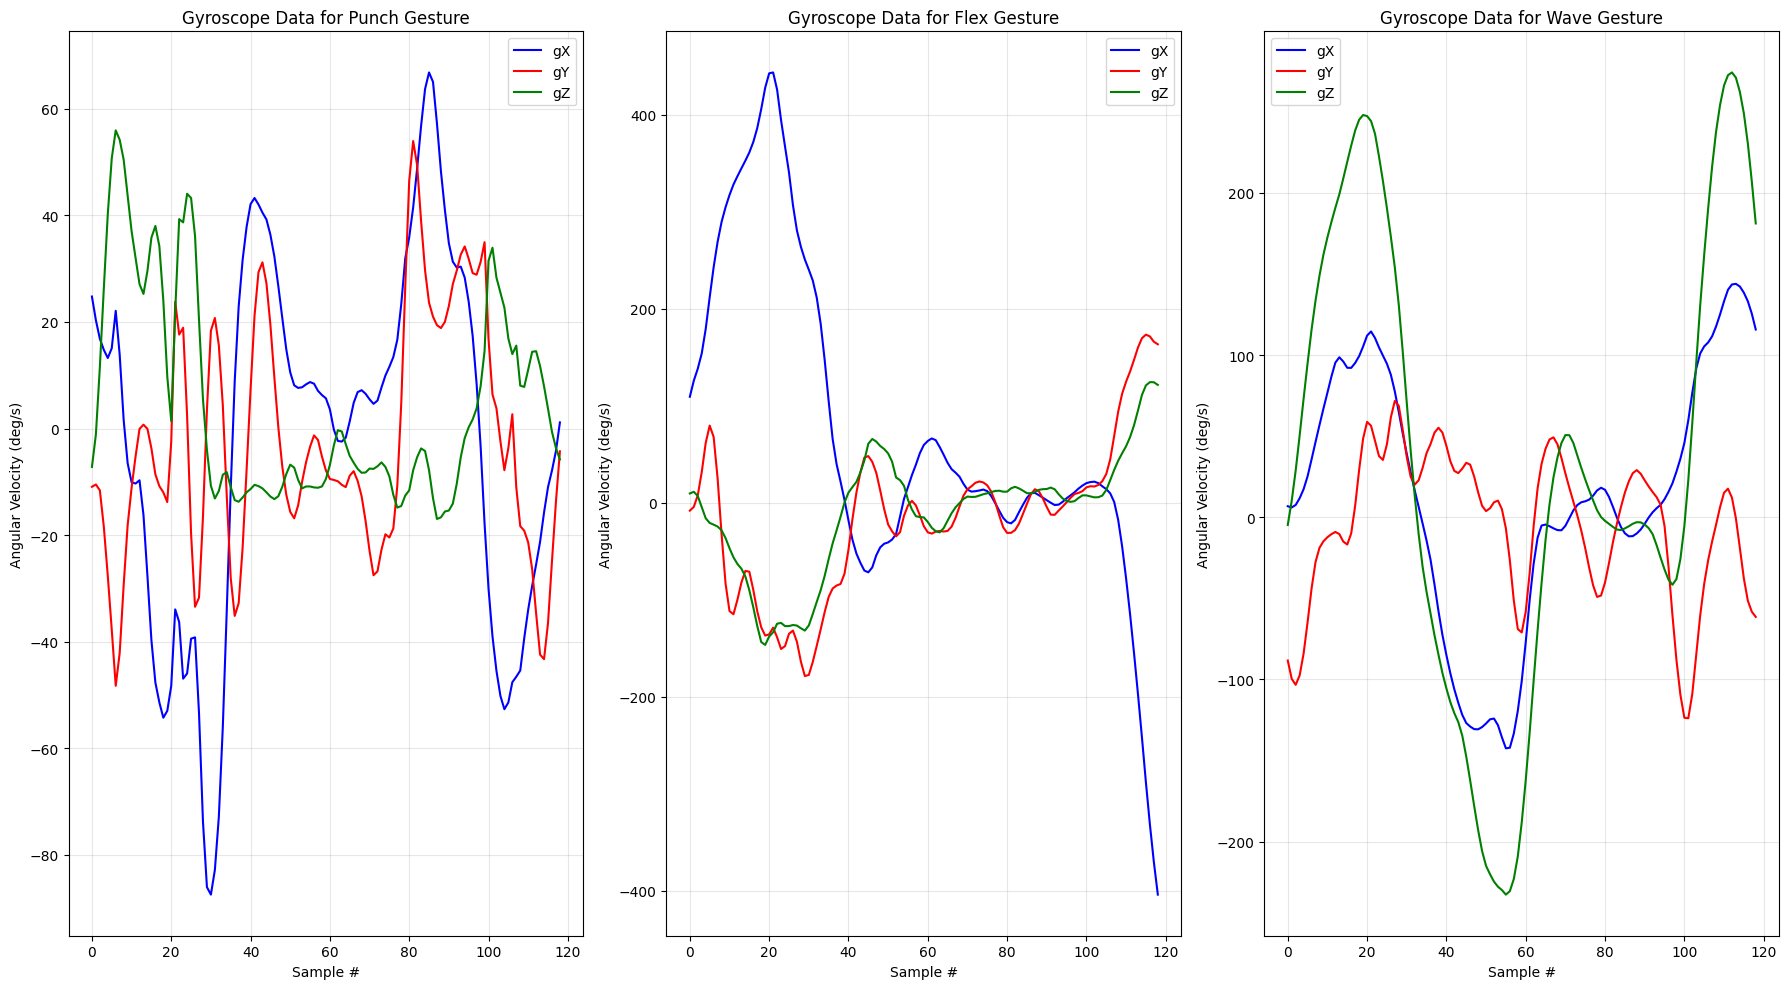

Processing index 0 for gesture 'punch'.
	Loaded 3570 samples from punch.csv
	Found 30 complete recordings
Processing index 1 for gesture 'flex'.
	Loaded 3570 samples from flex.csv
	Found 30 complete recordings
Processing index 2 for gesture 'wave'.
	Loaded 3570 samples from wave.csv
	Found 30 complete recordings
Data set parsing complete. Total examples: 180
Examples per class: [60. 60. 60.]
Using 60 examples per class for a perfectly balanced dataset
Balanced dataset: 180 examples
Examples per class: [60. 60. 60.]
Training set: 125 examples
Validation set: 28 examples
Test set: 27 examples


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │        21,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,963 (85.79 KB)

 Trainable params: 21,963 (85.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3841 - loss: 1.1107 - val_accuracy: 0.3214 - val_loss: 1.1035
Epoch 2/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3868 - loss: 1.0915 - val_accuracy: 0.2857 - val_loss: 1.1058
Epoch 3/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3325 - loss: 1.0773 - val_accuracy: 0.2857 - val_loss: 1.1068
Epoch 4/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5139 - loss: 1.0430 - val_accuracy: 0.2857 - val_loss: 1.0965
Epoch 5/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4360 - loss: 1.0302 - val_accuracy: 0.3214 - val_loss: 1.0865
Epoch 6/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5153 - loss: 1.0151 - val_accuracy: 0.2857 - val_loss: 1.0671
Epoch 7/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4999 - loss: 1.0018 - val_accuracy: 0.4286 - val_loss: 1.0535
Epoch 8/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4692 - loss: 0.9869 - val_accuracy: 0.5714 - v

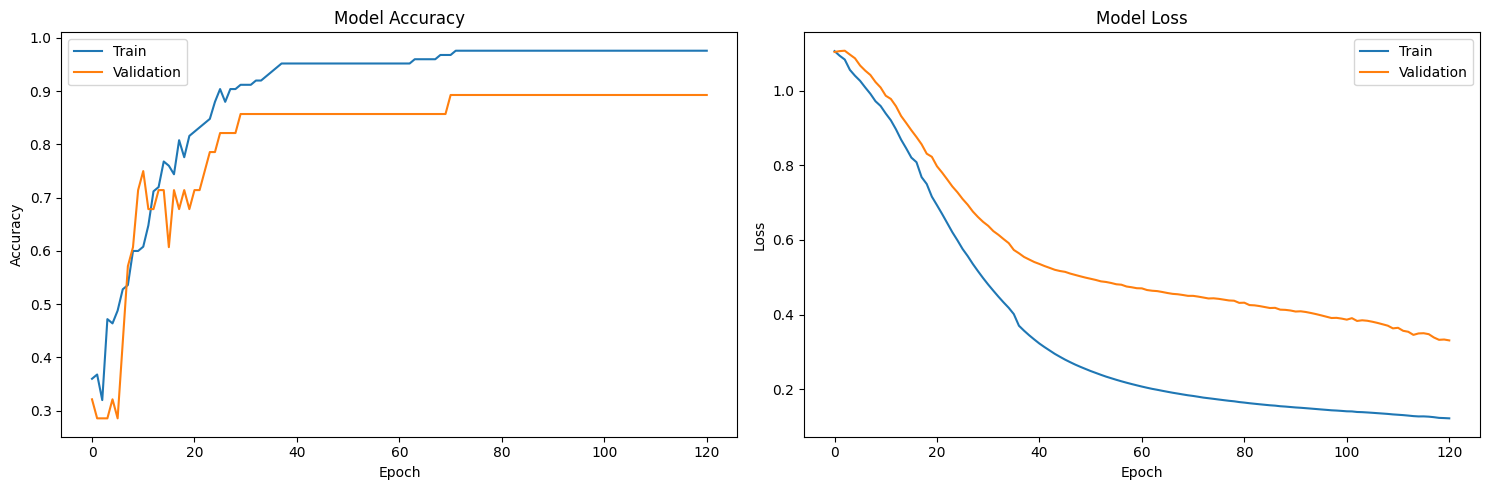

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9259 - loss: 0.3249
Test loss: 0.3249
Test accuracy: 0.9259
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Confusion Matrix:
      Predicted
       punch   flex    wave    
Actual
punch         8       0       0
flex          2       8       0
wave          0       0       9
punch accuracy: 100.00%
flex accuracy: 80.00%
wave accuracy: 100.00%
Overall accuracy: 92.59%
Saved artifact at '/tmp/tmpj1hvlnsd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 714), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133814788938384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133814788941648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133814788943376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133814788939152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133814788943568: TensorSpec

In [1]:
# Balanced TinyML Gesture Recognition for Arduino
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Define the gestures to match your Arduino code
GESTURES = [
    "punch",
    "flex",
    "wave"
]

SAMPLES_PER_GESTURE = 119  # Must match the Arduino sketch

NUM_GESTURES = len(GESTURES)

# Create a one-hot encoded matrix for the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

# First, visualize the gesture data
plt.figure(figsize=(18, 10))

# Read and plot each gesture file
for gesture_index, gesture in enumerate(GESTURES):
    try:
        # Read the CSV file
        df = pd.read_csv(f"/content/{gesture}.csv")
        print(f"Loaded {len(df)} samples from {gesture}.csv")

        # Create a subplot for this gesture
        plt.subplot(1, 3, gesture_index+1)

        # Plot first recording (119 samples) of accelerometer data
        plt.plot(df['aX'][:SAMPLES_PER_GESTURE], 'b-', label='aX')
        plt.plot(df['aY'][:SAMPLES_PER_GESTURE], 'r-', label='aY')
        plt.plot(df['aZ'][:SAMPLES_PER_GESTURE], 'g-', label='aZ')

        plt.title(f'Accelerometer Data for {gesture.capitalize()} Gesture')
        plt.xlabel('Sample #')
        plt.ylabel('Acceleration (G)')
        plt.legend()
        plt.grid(True, alpha=0.3)

    except Exception as e:
        print(f"Error processing {gesture}.csv for visualization: {e}")

plt.tight_layout()
plt.show()

# Visualize the gyroscope data
plt.figure(figsize=(18, 10))

# Read and plot each gesture file - gyroscope data
for gesture_index, gesture in enumerate(GESTURES):
    try:
        # Read the CSV file
        df = pd.read_csv(f"/content/{gesture}.csv")

        # Create a subplot for this gesture
        plt.subplot(1, 3, gesture_index+1)

        # Plot first recording (119 samples) of gyroscope data
        plt.plot(df['gX'][:SAMPLES_PER_GESTURE], 'b-', label='gX')
        plt.plot(df['gY'][:SAMPLES_PER_GESTURE], 'r-', label='gY')
        plt.plot(df['gZ'][:SAMPLES_PER_GESTURE], 'g-', label='gZ')

        plt.title(f'Gyroscope Data for {gesture.capitalize()} Gesture')
        plt.xlabel('Sample #')
        plt.ylabel('Angular Velocity (deg/s)')
        plt.legend()
        plt.grid(True, alpha=0.3)

    except Exception as e:
        print(f"Error processing {gesture}.csv for gyroscope visualization: {e}")

plt.tight_layout()
plt.show()

inputs = []
outputs = []

# Process each gesture file
for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    print(f"Processing index {gesture_index} for gesture '{gesture}'.")

    output = ONE_HOT_ENCODED_GESTURES[gesture_index]

    # Read the CSV file
    try:
        df = pd.read_csv(f"/content/{gesture}.csv")
        print(f"\tLoaded {len(df)} samples from {gesture}.csv")

        # Calculate how many complete recordings we have
        num_recordings = len(df) // SAMPLES_PER_GESTURE
        print(f"\tFound {num_recordings} complete recordings")

        # Process each recording
        for i in range(num_recordings):
            # Extract the current recording
            start_idx = i * SAMPLES_PER_GESTURE
            end_idx = start_idx + SAMPLES_PER_GESTURE
            recording = df.iloc[start_idx:end_idx]

            # Basic tensor with normalized values
            tensor = []
            for j in range(SAMPLES_PER_GESTURE):
                if j < len(recording):
                    # Normalize the data must match the Arduino Sketch
                    tensor += [
                        (recording['aX'].iloc[j] + 4.0) / 8.0,
                        (recording['aY'].iloc[j] + 4.0) / 8.0,
                        (recording['aZ'].iloc[j] + 4.0) / 8.0,
                        (recording['gX'].iloc[j] + 2000.0) / 4000.0,
                        (recording['gY'].iloc[j] + 2000.0) / 4000.0,
                        (recording['gZ'].iloc[j] + 2000.0) / 4000.0
                    ]

            # Only add complete recordings
            if len(tensor) == SAMPLES_PER_GESTURE * 6:
                inputs.append(tensor)
                outputs.append(output)

                # Add ONE augmented version for ALL gesture types
                augmented_tensor = tensor.copy()
                # Add very small random noise (0.5% variation)
                for k in range(len(augmented_tensor)):
                    augmented_tensor[k] += np.random.uniform(-0.005, 0.005)
                    # Keep values within 0-1 range
                    augmented_tensor[k] = max(0, min(1, augmented_tensor[k]))

                inputs.append(augmented_tensor)
                outputs.append(output)

    except Exception as e:
        print(f"Error processing {gesture}.csv: {e}")

# Convert the lists to numpy arrays
inputs = np.array(inputs)
outputs = np.array(outputs)

print(f"Data set parsing complete. Total examples: {len(inputs)}")

# Count examples per class
class_counts = np.sum(outputs, axis=0)
print(f"Examples per class: {class_counts}")

# Create a completely balanced dataset
all_indices = np.arange(len(inputs))
balanced_indices = []

# Find the minimum count across classes
min_count = min([np.sum(np.argmax(outputs, axis=1) == i) for i in range(NUM_GESTURES)])
print(f"Using {min_count} examples per class for a perfectly balanced dataset")

# Select exactly min_count examples from each class
for gesture_index in range(NUM_GESTURES):
    # Get indices for this gesture
    gesture_indices = all_indices[np.argmax(outputs, axis=1) == gesture_index]
    # Shuffle them
    np.random.shuffle(gesture_indices)
    # Take exactly min_count examples
    balanced_indices.extend(gesture_indices[:min_count])

# Create a balanced dataset
balanced_inputs = inputs[balanced_indices]
balanced_outputs = outputs[balanced_indices]

print(f"Balanced dataset: {len(balanced_inputs)} examples")
print(f"Examples per class: {np.sum(balanced_outputs, axis=0)}")

# Now split the balanced dataset
np.random.shuffle(balanced_indices)
TRAIN_SPLIT = int(0.7 * len(balanced_indices))
TEST_SPLIT = int(0.85 * len(balanced_indices))

train_indices = balanced_indices[:TRAIN_SPLIT]
val_indices = balanced_indices[TRAIN_SPLIT:TEST_SPLIT]
test_indices = balanced_indices[TEST_SPLIT:]

# Create train, validation and test sets
inputs_train = inputs[train_indices]
outputs_train = outputs[train_indices]
inputs_val = inputs[val_indices]
outputs_val = outputs[val_indices]
inputs_test = inputs[test_indices]
outputs_test = outputs[test_indices]

print(f"Training set: {len(inputs_train)} examples")
print(f"Validation set: {len(inputs_val)} examples")
print(f"Test set: {len(inputs_test)} examples")


###########################################
###############TRAINING####################
###########################################


model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(inputs_train.shape[1],)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')
])

# Use a gentle optimizer with a low learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

# Compile with standard settings
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Simple model summary
model.summary()

# Use early stopping with very high patience
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=50,
    restore_best_weights=True
)

# Train with explicit validation data
history = model.fit(
    inputs_train,
    outputs_train,
    epochs=300,
    batch_size=2,  # Very small batch size
    validation_data=(inputs_val, outputs_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot the training history
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(inputs_test, outputs_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Predictions and confusion matrix
predictions = model.predict(inputs_test)
confusion = np.zeros((NUM_GESTURES, NUM_GESTURES), dtype=int)

for i in range(len(predictions)):
    pred_index = np.argmax(predictions[i])
    actual_index = np.argmax(outputs_test[i])
    confusion[actual_index][pred_index] += 1

print("\nConfusion Matrix:")
print("      Predicted")
print("       ", end="")
for i in range(NUM_GESTURES):
    print(f"{GESTURES[i]:8s}", end="")
print("\nActual")
for i in range(NUM_GESTURES):
    print(f"{GESTURES[i]:7s}", end="")
    for j in range(NUM_GESTURES):
        print(f"{confusion[i][j]:8d}", end="")
    print()

# Calculate class-wise accuracy
for i in range(NUM_GESTURES):
    total = np.sum(confusion[i])
    if total > 0:
        accuracy = confusion[i][i] / total * 100
        print(f"{GESTURES[i]} accuracy: {accuracy:.2f}%")
    else:
        print(f"{GESTURES[i]} accuracy: N/A (no test examples)")

# Calculate overall accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)
print(f"Overall accuracy: {accuracy*100:.2f}%")

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("gesture_model.tflite", "wb") as f:
    f.write(tflite_model)

# Create the Arduino header file
print("Creating Arduino header file...")
model_h_text = "const unsigned char model[] = {\n"

with open("gesture_model.tflite", "rb") as f:
    data = f.read()
    for i in range(len(data)):
        model_h_text += f"0x{data[i]:02x}"
        if i < len(data) - 1:
            model_h_text += ", "
        if (i + 1) % 12 == 0:
            model_h_text += "\n"
    model_h_text += "\n};\n"

with open("model.h", "w") as f:
    f.write(model_h_text)

print(f"Model saved as 'model.h' ({os.path.getsize('model.h')} bytes)")
print("\nUpdate your Arduino sketch with:")
print("const char* GESTURES[] = {")
for gesture in GESTURES:
    print(f'  "{gesture}",')
print("};")